In [1]:
import requests
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import IFrame
import matplotlib.font_manager as fm

plt.style.use('ggplot')
%matplotlib inline
pd.options.display.max_columns=25

/usr/local/lib/python2.7/dist-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
url = 'http://stats.nba.com/stats/shotchartdetail?'\
        'CFID=&CFPARAMS=&ContextFilter=&ContextMeasure=FGA'\
        '&Counter=1000&DateFrom=&DateTo=&Direction=DESC'\
        '&GameID=0021500051&GameSegment=&LastNGames=0&LeagueID=00'\
        '&Location=&Month=0&OpponentTeamID=0&Outcome=&Period=0'\
        '&PlayerID=0&PlayerOrTeam=T&Position=&RookieYear='\
        '&Season=2015-16&SeasonSegment=&SeasonType=Regular+Season'\
        '&Sorter=PTS&TeamID=1610612744&VsConference=&VsDivision='
response = requests.get(url)
response.json().keys()

[u'resource', u'resultSets', u'parameters']

In [3]:
resource = response.json()["resource"]
resultsSets = response.json()["resultSets"]
parameters = response.json()["parameters"]
print resource
parameters

shotchartdetail


{u'AheadBehind': None,
 u'ClutchTime': None,
 u'ContextFilter': u'',
 u'ContextMeasure': u'FGA',
 u'DateFrom': None,
 u'DateTo': None,
 u'EndPeriod': None,
 u'EndRange': None,
 u'GameID': u'0021500051',
 u'GameSegment': None,
 u'LastNGames': 0,
 u'LeagueID': u'00',
 u'Location': None,
 u'Month': 0,
 u'OpponentTeamID': 0,
 u'Outcome': None,
 u'Period': 0,
 u'PlayerID': 0,
 u'PointDiff': None,
 u'Position': None,
 u'RangeType': None,
 u'RookieYear': None,
 u'Season': u'2015-16',
 u'SeasonSegment': None,
 u'SeasonType': u'Regular Season',
 u'StartPeriod': None,
 u'StartRange': None,
 u'TeamID': 1610612744,
 u'VsConference': None,
 u'VsDivision': None}

In [4]:
print type(resultsSets)

<type 'list'>


In [5]:
print len(resultsSets)

2


In [6]:
[type(r) for r in resultsSets]

[dict, dict]

In [7]:
[r.keys() for r in resultsSets]

[[u'headers', u'rowSet', u'name'], [u'headers', u'rowSet', u'name']]

In [8]:
[r['name'] for r in resultsSets]

[u'Shot_Chart_Detail', u'LeagueAverages']

In [9]:
resultsSets[0]['headers']

[u'GRID_TYPE',
 u'GAME_ID',
 u'GAME_EVENT_ID',
 u'PLAYER_ID',
 u'PLAYER_NAME',
 u'TEAM_ID',
 u'TEAM_NAME',
 u'PERIOD',
 u'MINUTES_REMAINING',
 u'SECONDS_REMAINING',
 u'EVENT_TYPE',
 u'ACTION_TYPE',
 u'SHOT_TYPE',
 u'SHOT_ZONE_BASIC',
 u'SHOT_ZONE_AREA',
 u'SHOT_ZONE_RANGE',
 u'SHOT_DISTANCE',
 u'LOC_X',
 u'LOC_Y',
 u'SHOT_ATTEMPTED_FLAG',
 u'SHOT_MADE_FLAG']

In [10]:
resultsSets[0]['rowSet'][0]

[u'Shot Chart Detail',
 u'0021500051',
 4,
 203084,
 u'Harrison Barnes',
 1610612744,
 u'Golden State Warriors',
 1,
 11,
 27,
 u'Missed Shot',
 u'Turnaround Jump Shot',
 u'2PT Field Goal',
 u'Mid-Range',
 u'Left Side(L)',
 u'8-16 ft.',
 11,
 -110,
 46,
 1,
 0]

Let's load the `resultsSets[0]` into a dataframe using the header for column labels

In [11]:
sc_df = pd.DataFrame(resultsSets[0]['rowSet'],columns=resultsSets[0]['headers'])
sc_df.head(5)

,GRID_TYPE,GAME_ID,GAME_EVENT_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_NAME,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,EVENT_TYPE,ACTION_TYPE,SHOT_TYPE,SHOT_ZONE_BASIC,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG
0,Shot Chart Detail,0021500051,4,203084,Harrison Barnes,1610612744,Golden State Warriors,1,11,27,Missed Shot,Turnaround Jump Shot,2PT Field Goal,Mid-Range,Left Side(L),8-16 ft.,11,-110,46,1,0
1,Shot Chart Detail,0021500051,11,201939,Stephen Curry,1610612744,Golden State Warriors,1,10,36,Made Shot,Jump Shot,3PT Field Goal,Above the Break 3,Left Side Center(LC),24+ ft.,28,-210,188,1,1
2,Shot Chart Detail,0021500051,13,203110,Draymond Green,1610612744,Golden State Warriors,1,10,5,Made Shot,Jump Shot,3PT Field Goal,Above the Break 3,Left Side Center(LC),24+ ft.,26,-173,203,1,1
3,Shot Chart Detail,0021500051,17,201939,Stephen Curry,1610612744,Golden State Warriors,1,9,34,Made Shot,Running Jump Shot,2PT Field Goal,Mid-Range,Left Side Center(LC),16-24 ft.,20,-160,120,1,1
4,Shot Chart Detail,0021500051,26,203084,Harrison Barnes,1610612744,Golden State Warriors,1,8,35,Missed Shot,Turnaround Jump Shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,3,22,26,1,0


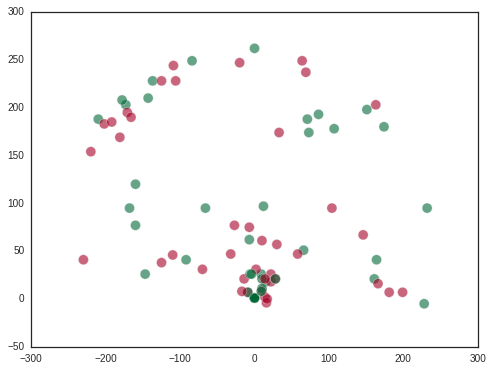

In [17]:

plt.style.use('seaborn-white')
fig = plt.figure(figsize=(8, 6))

scat = plt.scatter(x=sc_df.LOC_X,y=sc_df.LOC_Y,c=sc_df.SHOT_MADE_FLAG,
    cmap=plt.cm.RdYlGn, s=100, alpha=.6)
#plt.style.use('grayscale')
#court = plt.imread("img/halfcourt.png")
#img = plt.imshow(court, zorder=0, extent=[0,94,50,0])
#plt.style.use('seaborn-white')
#cbar = fig.colorbar(scat,orientation='vertical',fraction=0.025)
#cbar.ax.invert_xaxis()
#cbar.ax.set_ylabel('Ball height (ft.) above court')
# xaxis is 0-94 ft. yaxis 50-0 feet (inverted)
#import matplotlib.font_manager as fm
# zorder should be less than zorder of scatter, so court is drawn first.
#annotation_font = fm.FontProperties(family='Bitstream Vera Sans',style='normal',size=10,weight='normal',stretch='normal')
#scat.annotate('[START] Connelly drives baseline',
#              xy = ball_xdat

#
#plt.imshow(court, zorder=0, extent=[0,94,50,0])

#plt.xlim(0,94)
plt.show()

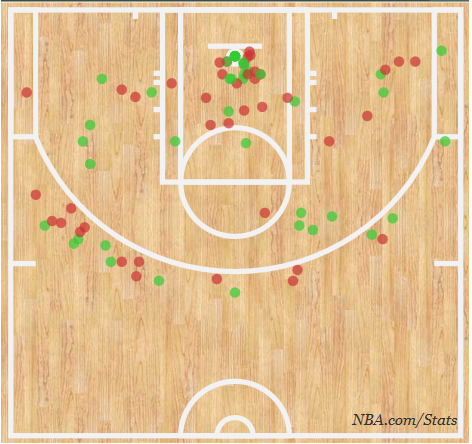

In [16]:
from IPython.display import Image
Image('img/example_nba_shotchart.png')

Okay, so we can see that the court is flipped on the NBA website. So I will flip my y-axis

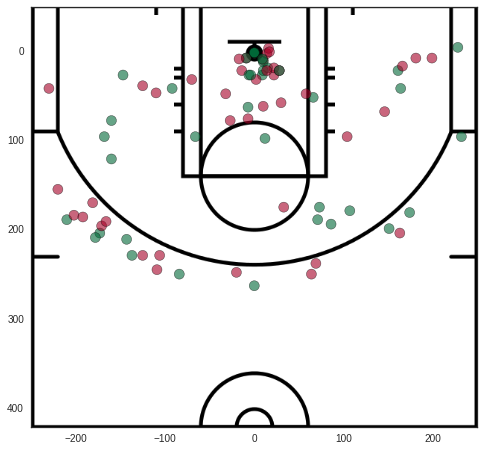

In [33]:
plt.style.use('seaborn-white')

fig,ax = plt.subplots(figsize=(8, 8))
scat = plt.scatter(x=sc_df.LOC_X,y=sc_df.LOC_Y,c=sc_df.SHOT_MADE_FLAG,
    cmap=plt.cm.RdYlGn, s=100, alpha=.6, zorder=1)
ax.invert_yaxis()

plt.style.use('grayscale')
court = plt.imread("img/halfcourt.png")
img = plt.imshow(court, zorder=0, extent=[-250,250,420,-50])

plt.show()

Great, I can make sense and plot the data from nba.com.  Now I will get shot data for all players for the 2015-16 season and determine the best shooter from each zone.

Steps
1. Get playerids for all players this year
2. Pull shot data for each
3. Parse the data into a table with rows of players, columns of zone1_attempts zone1_made, etc.
4. Calculate best for each zone

In [102]:
shot_url = 'http://stats.nba.com/stats/leaguedashplayerptshot?LastNGames=0'\
    '&LeagueID=00&Month=0&OpponentTeamID=0&PORound=0&PaceAdjust=N&PerMode=PerGame'\
    '&Period=0&PlusMinus=N&Rank=N&Season=2015-16&SeasonType=Regular+Season&TeamID=0'
resp = requests.get(shot_url)
resp.json().keys()

[u'resource', u'resultSets', u'parameters']

In [103]:
player_info_df = pd.DataFrame(resp.json()['resultSets'][0]['rowSet'],columns=resp.json()['resultSets'][0]['headers'])
player_info_df.head(5)

,PLAYER_ID,PLAYER_NAME,PLAYER_LAST_TEAM_ID,PLAYER_LAST_TEAM_ABBREVIATION,AGE,GP,G,FGA_FREQUENCY,FGM,FGA,FG_PCT,EFG_PCT,FG2A_FREQUENCY,FG2M,FG2A,FG2_PCT,FG3A_FREQUENCY,FG3M,FG3A,FG3_PCT
0,201935,James Harden,1610612745,HOU,26,7,7,1,8.00,21.43,0.373,0.433,0.500,5.43,10.71,0.507,0.500,2.57,10.71,0.240
1,201566,Russell Westbrook,1610612760,OKC,26,7,7,1,10.00,21.00,0.476,0.514,0.762,8.43,16.00,0.527,0.238,1.57,5.00,0.314
2,201142,Kevin Durant,1610612760,OKC,27,7,7,1,10.43,20.71,0.503,0.569,0.690,7.71,14.29,0.540,0.310,2.71,6.43,0.422
3,203081,Damian Lillard,1610612757,POR,25,7,7,1,9.71,20.43,0.476,0.570,0.559,5.86,11.43,0.513,0.441,3.86,9.00,0.429
4,201939,Stephen Curry,1610612744,GSW,27,7,7,1,11.00,19.86,0.554,0.691,0.424,5.57,8.43,0.661,0.576,5.43,11.43,0.475


In [104]:
p = player_shot_df['PLAYER_ID'].iloc[0]
p

203083

In [69]:
#def get_player_shot_chart(pid):
sc_params = {u'AheadBehind': u'',
 u'ClutchTime': u'',
 u'ContextFilter': u'',
 u'ContextMeasure': u'FGA',
 u'DateFrom': u'',
 u'DateTo': u'',
 u'EndPeriod': u'',
 u'EndRange': u'',
 u'GameID': u'',
 u'GameSegment': u'',
 u'LastNGames': 0,
 u'LeagueID': u'00',
 u'Location': u'',
 u'Month': 0,
 u'OpponentTeamID': 0,
 u'Outcome': u'',
 u'Period': 0,
 u'PlayerID': 0,
 u'PointDiff': u'',
 u'Position': u'',
 u'RangeType': u'',
 u'RookieYear': u'',
 u'Season': u'2015-16',
 u'SeasonSegment': u'',
 u'SeasonType': u'Regular Season',
 u'StartPeriod': u'',
 u'StartRange': u'',
 u'TeamID': 0,
 u'VsConference': u'',
 u'VsDivision': u''}

#sc_params['PlayerID']=p
baseurl = 'http://stats.nba.com/stats/shotchartdetail?'
resp2 = requests.get(baseurl,params=sc_params)
print resp2.url
print resp2.json().keys()

http://stats.nba.com/stats/shotchartdetail?PlayerID=0&StartPeriod=&StartRange=&TeamID=0&VsConference=&Location=&SeasonType=Regular+Season&RangeType=&RookieYear=&Season=2015-16&DateFrom=&ClutchTime=&EndPeriod=&EndRange=&ContextFilter=&GameID=&OpponentTeamID=0&DateTo=&GameSegment=&AheadBehind=&PointDiff=&LastNGames=0&VsDivision=&LeagueID=00&Position=&Outcome=&ContextMeasure=FGA&SeasonSegment=&Period=0&Month=0
[u'resource', u'resultSets', u'parameters']


In [70]:
player_shot_df = pd.DataFrame(resp2.json()['resultSets'][0]['rowSet'],columns=resp2.json()['resultSets'][0]['headers'])
player_shot_df.head(5)

,GRID_TYPE,GAME_ID,GAME_EVENT_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_NAME,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,EVENT_TYPE,ACTION_TYPE,SHOT_TYPE,SHOT_ZONE_BASIC,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG
0,Shot Chart Detail,0021500001,2,203083,Andre Drummond,1610612765,Detroit Pistons,1,11,41,Missed Shot,Driving Layup Shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,1,-17,-6,1,0
1,Shot Chart Detail,0021500001,5,202694,Marcus Morris,1610612765,Detroit Pistons,1,11,21,Made Shot,Step Back Jump shot,2PT Field Goal,Mid-Range,Right Side(R),8-16 ft.,13,117,67,1,1
2,Shot Chart Detail,0021500001,6,200794,Paul Millsap,1610612737,Atlanta Hawks,1,11,0,Made Shot,Step Back Jump shot,2PT Field Goal,In The Paint (Non-RA),Right Side(R),8-16 ft.,12,76,95,1,1
3,Shot Chart Detail,0021500001,7,203484,Kentavious Caldwell-Pope,1610612765,Detroit Pistons,1,10,44,Made Shot,Driving Floating Jump Shot,2PT Field Goal,In The Paint (Non-RA),Left Side(L),8-16 ft.,8,-68,51,1,1
4,Shot Chart Detail,0021500001,8,201143,Al Horford,1610612737,Atlanta Hawks,1,10,27,Missed Shot,Jump Shot,2PT Field Goal,Mid-Range,Left Side Center(LC),16-24 ft.,20,-117,164,1,0


In [101]:
player_shot_df.shape

(16710, 21)

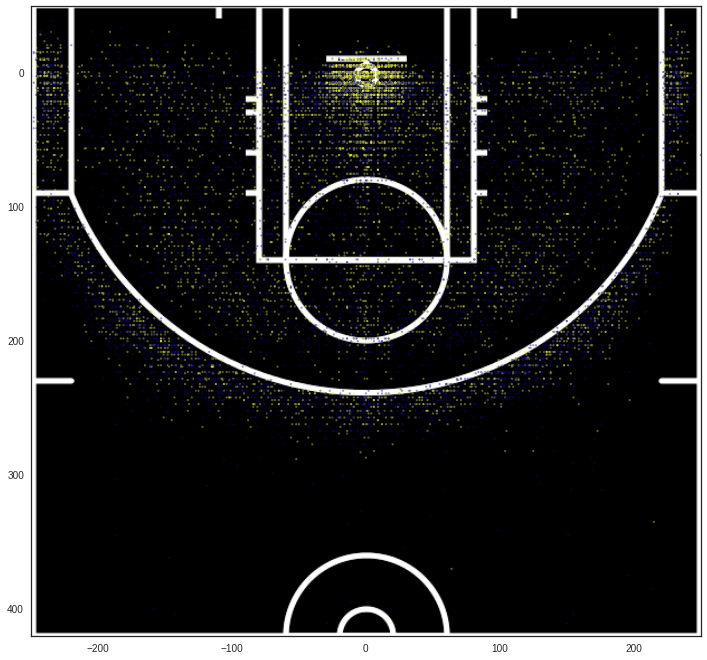

In [99]:
plt.style.use('seaborn-white')
from matplotlib.colors import LinearSegmentedColormap

#cmap = plt.get_cmap('')
fig,ax = plt.subplots(figsize=(12, 12))
scat = plt.scatter(x=player_shot_df.LOC_X,y=player_shot_df.LOC_Y,c=player_shot_df.SHOT_MADE_FLAG,
    cmap=plt.cm.plasma, s=5, alpha=.4, edgecolors='none', zorder=1)
ax.invert_yaxis()

#plt.style.use('grayscale')
court = plt.imread("img/halfcourt.png")
img = plt.imshow(court, zorder=0, extent=[-250,250,420,-50])

plt.show()

In [107]:
player_shot_df.head(10)

,GRID_TYPE,GAME_ID,GAME_EVENT_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_NAME,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,EVENT_TYPE,ACTION_TYPE,SHOT_TYPE,SHOT_ZONE_BASIC,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG
0,Shot Chart Detail,0021500001,2,203083,Andre Drummond,1610612765,Detroit Pistons,1,11,41,Missed Shot,Driving Layup Shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,1,-17,-6,1,0
1,Shot Chart Detail,0021500001,5,202694,Marcus Morris,1610612765,Detroit Pistons,1,11,21,Made Shot,Step Back Jump shot,2PT Field Goal,Mid-Range,Right Side(R),8-16 ft.,13,117,67,1,1
2,Shot Chart Detail,0021500001,6,200794,Paul Millsap,1610612737,Atlanta Hawks,1,11,0,Made Shot,Step Back Jump shot,2PT Field Goal,In The Paint (Non-RA),Right Side(R),8-16 ft.,12,76,95,1,1
3,Shot Chart Detail,0021500001,7,203484,Kentavious Caldwell-Pope,1610612765,Detroit Pistons,1,10,44,Made Shot,Driving Floating Jump Shot,2PT Field Goal,In The Paint (Non-RA),Left Side(L),8-16 ft.,8,-68,51,1,1
4,Shot Chart Detail,0021500001,8,201143,Al Horford,1610612737,Atlanta Hawks,1,10,27,Missed Shot,Jump Shot,2PT Field Goal,Mid-Range,Left Side Center(LC),16-24 ft.,20,-117,164,1,0
5,Shot Chart Detail,0021500001,10,203083,Andre Drummond,1610612765,Detroit Pistons,1,10,13,Missed Shot,Turnaround Hook Shot,2PT Field Goal,In The Paint (Non-RA),Left Side(L),8-16 ft.,8,-79,31,1,0
6,Shot Chart Detail,0021500001,13,200794,Paul Millsap,1610612737,Atlanta Hawks,1,10,1,Made Shot,Turnaround Fadeaway Bank Jump Shot,2PT Field Goal,Mid-Range,Right Side(R),8-16 ft.,12,123,3,1,1
7,Shot Chart Detail,0021500001,20,201952,Jeff Teague,1610612737,Atlanta Hawks,1,9,29,Missed Shot,Pullup Jump shot,2PT Field Goal,Mid-Range,Center(C),8-16 ft.,15,-2,154,1,0
8,Shot Chart Detail,0021500001,22,202704,Reggie Jackson,1610612765,Detroit Pistons,1,9,22,Made Shot,Running Pull-Up Jump Shot,3PT Field Goal,Above the Break 3,Center(C),24+ ft.,24,-25,239,1,1
9,Shot Chart Detail,0021500001,23,201952,Jeff Teague,1610612737,Atlanta Hawks,1,9,12,Missed Shot,Driving Layup Shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,1,12,2,1,0


In [113]:
TEMP=player_shot_df.groupby(['PLAYER_ID','SHOT_ZONE_AREA','SHOT_ZONE_RANGE']).sum()
TEMP.head(20)

GAME_EVENT_ID      TEAM_ID  \
PLAYER_ID SHOT_ZONE_AREA        SHOT_ZONE_RANGE                               
708       Center(C)             Less Than 8 ft.            840   4831838250   
          Left Side Center(LC)  16-24 ft.                 1162   6442451000   
          Left Side(L)          8-16 ft.                   779   3221225500   
          Right Side Center(RC) 16-24 ft.                   73   4831838250   
          Right Side(R)         16-24 ft.                   31   1610612750   
977       Back Court(BC)        Back Court Shot            273   1610612747   
          Center(C)             16-24 ft.                  752   8053063735   
                                24+ ft.                   2550  11274289229   
                                8-16 ft.                  1199   4831838241   
                                Less Than 8 ft.           3829  20937965711   
          Left Side Center(LC)  16-24 ft.                   86   3221225494   
                                24+ ft.                   2662  20937965711   
          Left Side(L)          16-24 ft.                  446   3221225494   
                                24+ ft.                   1106   4831838241   
                                8-16 ft.                  1542   8053063735   
          Right Side Center(RC) 16-24 ft.                 1562  14495514723   
                                24+ ft.                   4809  27380416699   
          Right Side(R)         16-24 ft.                  400   6442450988   
                                24+ ft.                   1493  11274289229   
                                8-16 ft.                  1800   9663676482   

                                                 PERIOD  MINUTES_REMAINING  \
PLAYER_ID SHOT_ZONE_AREA        SHOT_ZONE_RANGE                              
708       Center(C)             Less Than 8 ft.       7                  7   
          Left Side Center(LC)  16-24 ft.            10                 22   
          Left Side(L)          8-16 ft.              7                 16   
          Right Side Center(RC) 16-24 ft.             3                 27   
          Right Side(R)         16-24 ft.             1                  8   
977       Back Court(BC)        Back Court Shot       2                  0   
          Center(C)             16-24 ft.             9                 38   
                                24+ ft.              22                 42   
                                8-16 ft.             10                 15   
                                Less Than 8 ft.      33                 71   
          Left Side Center(LC)  16-24 ft.             2                 16   
                                24+ ft.              25                 64   
          Left Side(L)          16-24 ft.             5                 18   
                                24+ ft.              10                 23   
                                8-16 ft.             12                 12   
          Right Side Center(RC) 16-24 ft.            16                 53   
                                24+ ft.              43                 91   
          Right Side(R)         16-24 ft.             6                 32   
                                24+ ft.              14                 39   
                                8-16 ft.             17                 44   

                                                 SECONDS_REMAINING  \
PLAYER_ID SHOT_ZONE_AREA        SHOT_ZONE_RANGE                      
708       Center(C)             Less Than 8 ft.                107   
          Left Side Center(LC)  16-24 ft.                      110   
          Left Side(L)          8-16 ft.                        46   
          Right Side Center(RC) 16-24 ft.                      114   
          Right Side(R)         16-24 ft.                       16   
977       Back Court(BC)        Back Court Shot                  0   
          Center(C)             1